In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATABASE = "/home/dude/huge/dude/rbp-miRNA/clip/HepG2.json"

with open(PATH_TO_DATABASE) as fl:
    gtf_clip_dct = json.load(fl)

In [3]:
clip_positions = {
    "five_prime_utr": 0,
    "three_prime_utr": 0,
    "transcript": 0,
    "CDS": 0
}

for protein in gtf_clip_dct:
    for position in gtf_clip_dct[protein]:
        clip_positions[position] += len(gtf_clip_dct[protein][position])

In [4]:
clip_positions

{'five_prime_utr': 0, 'three_prime_utr': 1, 'transcript': 12, 'CDS': 0}

In [5]:
clip_table = []
for protein in gtf_clip_dct:
    for position in ["three_prime_utr", "CDS"]:
        clip_table.append([
            protein,
            len(gtf_clip_dct[protein]["three_prime_utr"]),
            len(gtf_clip_dct[protein]["five_prime_utr"]),
            len(gtf_clip_dct[protein]["CDS"]),
            len(gtf_clip_dct[protein]["transcript"]),
        ])

clip_table = pd.DataFrame(clip_table, columns=[
    "protein",
    "three_prime_utr",
    "five_prime_utr",
    "CDS",
    "transcript"
])

clip_table.head()

,protein,three_prime_utr,five_prime_utr,CDS,transcript
0,KHSRP,0,0,0,5
1,KHSRP,0,0,0,5
2,HLTF,0,0,0,6
3,HLTF,0,0,0,6
4,DDX55,1,0,0,1


<AxesSubplot:xlabel='CDS', ylabel='Count'>

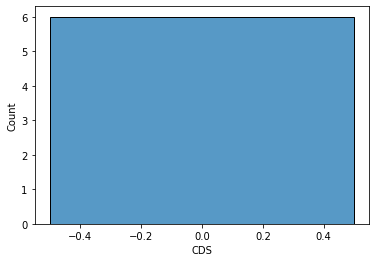

In [6]:
sns.histplot(clip_table["CDS"])

<AxesSubplot:xlabel='three_prime_utr', ylabel='Count'>

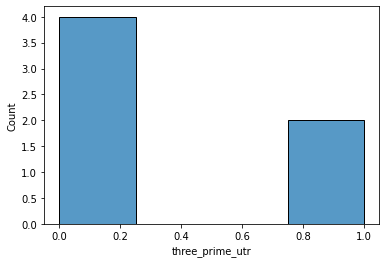

In [7]:
sns.histplot(clip_table["three_prime_utr"])

<AxesSubplot:xlabel='CDS', ylabel='three_prime_utr'>

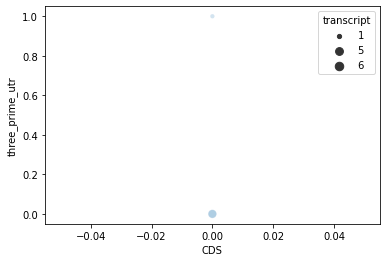

In [8]:
sns.scatterplot(
    data=clip_table,
    x="CDS", y="three_prime_utr",
    size="transcript", alpha=0.1)

In [9]:
print(len(clip_table.loc[
    (clip_table["three_prime_utr"] == 0) & \
    (clip_table["five_prime_utr"] == 0) & \
    (clip_table["CDS"] == 0)
]))
print(len(clip_table.loc[
    (clip_table["three_prime_utr"] == 0) & \
    (clip_table["five_prime_utr"] == 0) & \
    (clip_table["CDS"] == 0) & \
    (clip_table["transcript"] == 0)
]))
print(len(clip_table))

4
0
6


In [10]:
print(len(clip_table.loc[
    (clip_table["three_prime_utr"] != 0)
]))
print(len(clip_table.loc[
    (clip_table["five_prime_utr"] != 0)
]))
print(len(clip_table.loc[
    (clip_table["CDS"] != 0)
]))

2
0
0


In [12]:
gtf_clip_table = []
for protein in gtf_clip_dct:
    for peak in gtf_clip_dct[protein]["CDS"]:
        if not peak in gtf_clipt_dct[protein]["transcript"]:
            print(peak)
        else:
            print("1")